## Plot force plots in log-odds and probability space

In [1]:
from sklearn.metrics import log_loss, roc_auc_score
from xgboost import XGBClassifier

import matplotlib.pylab as plt
import numpy as np

import matplotlib
import pickle
import shap
import os

from deepshap.data import load_nhanes_new

# Name of experiment we are running
exp_name = "cycle_shift"

# Load data
X_train, X_valid, X_test, y_train, y_valid, y_test = load_nhanes_new()

# Train or load model
mpath = "models/{}_xgb.p".format(exp_name)
if not os.path.exists(mpath):
    model = XGBClassifier()
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], 
              early_stopping_rounds=10, verbose=False)
    pickle.dump(model, open(mpath,"wb"))
else:
    model = pickle.load(open(mpath,"rb"))
    
# Evaluate model performance
print("Train ROC AUC ", roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
print("Test ROC AUC  ", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
print("Train loss    ", log_loss(y_train, model.predict_proba(X_train)[:,1]))
print("Test loss     ", log_loss(y_test, model.predict_proba(X_test)[:,1]))

Train ROC AUC  0.9882752748310369
Test ROC AUC   0.8681190191906044
Train loss     0.08771404129969228
Test loss      0.26650387368177847


In [27]:
rand_inds = np.random.choice(range(X_train.shape[0]), 1000, replace=False)
reference = X_train.iloc[rand_inds]
explicand = X_train.iloc[np.random.choice(range(X_train.shape[0]), 1000, replace=False),:]

lodd_explr = shap.TreeExplainer(model, data=reference, model_output="raw")
lodd_attr  = lodd_explr.shap_values(explicand)

prob_explr = shap.TreeExplainer(model, data=reference, model_output="probability")
prob_attr  = prob_explr.shap_values(explicand)

 94%|=================== | 939/1000 [00:14<00:00]       

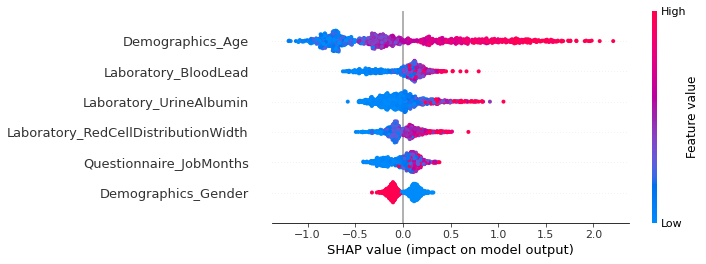

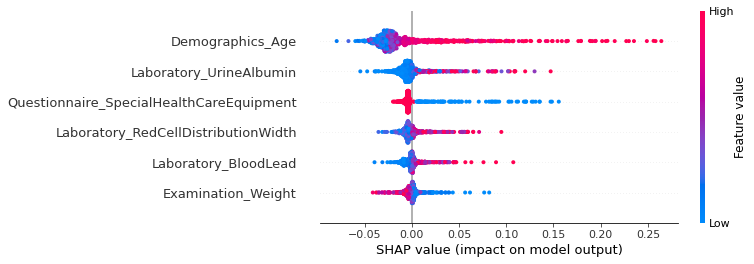

In [31]:
shap.summary_plot(lodd_attr, explicand, max_display=6, show=False)
plt.savefig("fig/summary_lodd.pdf")
plt.show()

shap.summary_plot(prob_attr, explicand, max_display=6, show=False)
plt.savefig("fig/summary_prob.pdf")
plt.show()